### PACE Rapid Response Notebook

To Do:
- adapt hackweek code to pull pace data for a given product, lat/lon extent, and time range defined before and after an event of interest
- spatially bin l2 data consistently?
- Make a mask of only pixels present both datasets (to prevent bias), compare data w/ pretty maps

In [1]:
import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

### Development test-case
Hurricane Erin, look at chl-a before and after hurricane for MAB
Timeline (using worldview): 
- Hurricane off florida/gulf stream PACE imagery on AUG 20
- AUG 21, hurricane passed and clear imagery
- Aug 18/19 hurricane not there yet

Lat/Lon bounds: 
UL:32.09, -76.63 
LR:27.78, -77.80


In [2]:
min_lon = -74.2
min_lat = 29.6
max_lon = -74.2
max_lat = 29.6

In [3]:
tspan = ("2025-08-21", "2025-08-22")
bbox = (min_lon, min_lat, max_lon, max_lat)

In [4]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC_NRT",
    temporal=tspan,
    bounding_box=bbox,
)
len(results)

1

In [5]:
paths = earthaccess.open(results)
paths

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

[<File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250821T170142.L2.OC_BGC.V3_1.NRT.nc>]

In [13]:
datatree = xr.open_datatree(paths[0])
dataset = xr.merge(datatree.to_dict().values())
dataset = dataset.set_coords(("longitude", "latitude"))
dataset = dataset.load()

C:\Users\gtrolley\AppData\Local\Temp\ipykernel_14432\3149936360.py:1: FutureWarning: In a future version, xarray will not decode the variable 'day' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  datatree = xr.open_datatree(paths[0])
C:\Users\gtrolley\AppData\Local\Temp\ipykernel_14432\3149936360.py:1: FutureWarning: In a future version, xarray will not decode the variable 'msec' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xa

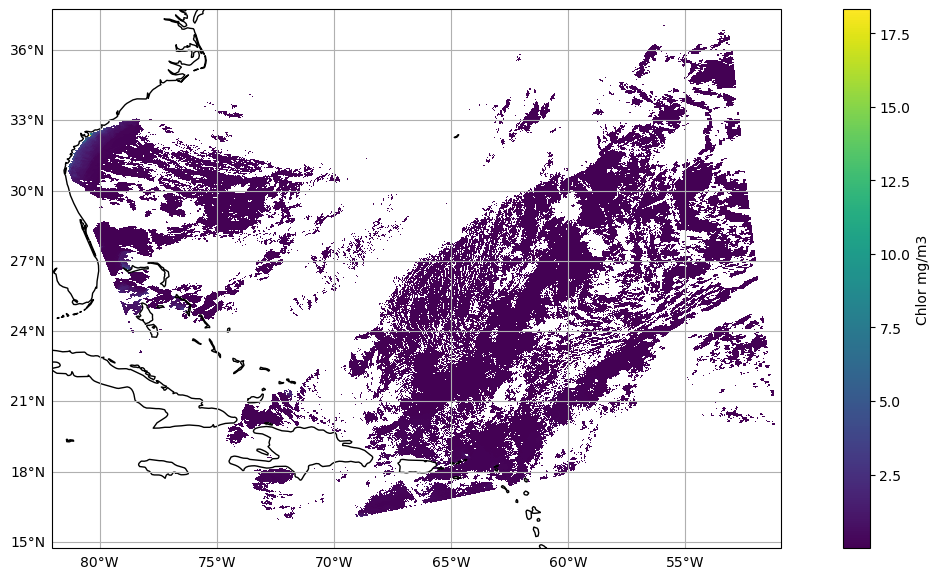

In [15]:
fig = plt.figure(figsize=(16,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset['chlor_a'].plot(x="longitude", y="latitude", cbar_kwargs={'label': 'Chlor mg/m3'},  ax=ax)
                                       